# Part 2: Regression

Whereas with classification we use a set of features (or independent variables) to predict a discrete output (dependent variable), in regression we are trying to predict a continuous output (e.g. a real valued number).

# 1) Boston Dataset

For demonstration, we will use scikit-learn's [Boston](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html) dataset. Instead of predicting discrete categories as we would in classification, with this dataset we can attempt to predict price, a continuous variable.

In [1]:
from sklearn.datasets import load_boston

boston = load_boston()

If you are going to follow along in other tutorials in the scikit-learn documentation, you will need to know the data structures used as inputs to the models. Let'see what's in the boston dataset:

In [2]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


The dataset is a dictionary-like object containing 5 items. The description (`DESCR`) will tell us more about the dataset:

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

So we are working on predicting the median home value from 506 observations using 13 features including crime rate, lot size, industry/commercial proportion, presence of the Charles River, nitric oxide concentration, rooms per dwelling, units built before 1940, distance to employment centers, access to highways, tax rate, school proxy, black population, and status. 

To get the variable names use the `.feature_names` attribute of the dataset, which is stored in a `numpy` array:

In [4]:
print('Feature Names:', boston.feature_names, '\n')
print('Type of the feature_names attribute:', type(boston.feature_names), '\n')
print('Number of features:', len(boston.feature_names), '\n')

Feature Names: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT'] 

Type of the feature_names attribute: <class 'numpy.ndarray'> 

Number of features: 13 



The dataset is stored in the `data` field of the dataset:

In [5]:
print('Example first row of data:\n', boston.data[0], '\n')
print('Type of the data:', type(boston.data), '\n')
print('Shape of the features data:', boston.data.shape)

Example first row of data:
 [6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
 4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00] 

Type of the data: <class 'numpy.ndarray'> 

Shape of the features data: (506, 13)


The data is stored as `numpy` array, where each row represents a data point (a house in this case), and each column represents a feature. So we have 13 variables worth of data for each of the 506 houses in this dataset.

The output variable (median price) or *y* is accessed via the `target` item in the dataset:

In [6]:
print('Example first output value:', boston.target[0], '\n')
print('Type of output (target) data:', type(boston.target), '\n')
print('Shape of output data:', boston.target.shape)

Example first output value: 24.0 

Type of output (target) data: <class 'numpy.ndarray'> 

Shape of output data: (506,)


The target array is only one dimension, lined up in order with the with the feature values in the data array.

Now that we're familiar with the input data, we need to split it up for training and testing, but first thing's first: **set the random seed!**

In [7]:
import numpy as np
np.random.seed(10)

Now we can use the train_test_split feature:

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target,
                                                    train_size=0.75, test_size=0.25)

Now we have 75% of the data as training data, and 25% of the data as testing data:

In [9]:
print('XTrain shape:', X_train.shape, 'YTrain shape:', y_train.shape, '\n')
print('XTest shape:', X_test.shape, 'YTest shape:', y_test.shape)

XTrain shape: (379, 13) YTrain shape: (379,) 

XTest shape: (127, 13) YTest shape: (127,)


In scikit-learn, as soon as you have `X_train`, `X_test`, `y_train`, and `y_test`, everything else is just a matter of choosing your mdoel and the parameters for it. But this should not be trivialized, selecting models and that model's parameters is *very* important. While we will not cover it here, choosing the correct model and parameters is the core skill of applying machine learning algorithms, and can have dramatic affects on the performance of your predictions.

# 2) Building models

The syntax in scikit-learn does not change for each model, only the parameters. It also is not very different from the classification model syntax. Examples of various models are given below:

## Linear Models

### GLM - Ordinary Least Squares Linear Regression

We'll start with a basic [OLS linear regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression):

In [10]:
from sklearn import linear_model
lin_reg = linear_model.LinearRegression(n_jobs=1)  # CPUs to use

In [11]:
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

We can see how well we fit the training set. When fitting classification models, the `.score` method would return mean accuracy. For regression models `.score()` returns the amount of variance in the output variable that can be explained by the model predictions. This is known as $R^2$, or R-squared. There are many other performance metrics that can be used when predicting continuous variables. See [here]() for an overview.

Let's look at the $R^2$ for the training data:

In [12]:
print('Training data R^2: %.04f' % (lin_reg.score(X_train, y_train)))

Training data R^2: 0.7576


And the test test. 

In [13]:
print('Test data R^2: %.04f' % (lin_reg.score(X_test, y_test))) #over-fitting?

Test data R^2: 0.6746


We can plot the coefficients to see which features impact house price the most. It looks like nitric oxide concentrations (NOX) have the largest negative association and number of rooms (RM) have the largest positive association with home price. 

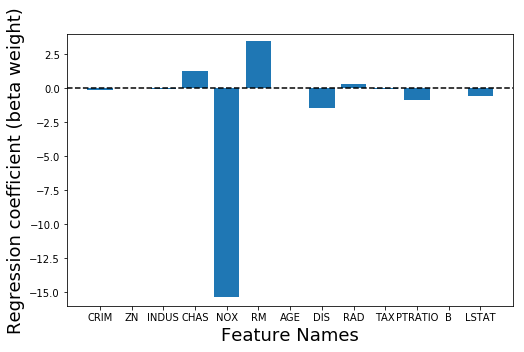

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8,5))
plt.bar(range(len(lin_reg.coef_)), lin_reg.coef_)
plt.xticks(np.arange(len(lin_reg.coef_)),boston.feature_names, fontsize=10);
plt.axhline(y=0,linestyle='--',color='k')
plt.ylabel('Regression coefficient (beta weight)', fontsize=18);
plt.xlabel('Feature Names', fontsize=18);
plt.ylim([-16.0,4]);

### GLM - Ridge Regression

If you have many features, you may want to consider regularization. 

Instead of minimizing least squares loss: 
$$ L(\beta) = \sum_i^n (y_i - \hat y_i)^2 $$ 

In ridge regression we additionally penalize the coefficients and minimize this: 

$$ L(\beta) = \sum_i^n (y_i - \hat y_i)^2  + \alpha \sum_j^p \beta^2 $$ 

Ridge regression takes a **hyerparameter**, called alpha (sometimes lambda). This hyperparameter indicates how much regularization should be done. In other words, how much to care about the coefficient penalty term vs how much to care about the sum of squared errors term. The higher the value of alpha the more regularization, and the smaller the resulting coefficients will be. See [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) for more.

If we use an `alpha` value of `0` then we get the same solution as the OLS regression done above. Let's prove that.

In [16]:
from sklearn import linear_model
ridge_reg = linear_model.Ridge(alpha=0,  # regularization
                               normalize=True,  # normalize X regressors
                               solver='auto',
                               random_state = 10)  # options = ‘auto’, ‘svd’, ‘cholesky’, ‘lsqr’, ‘sparse_cg’, ‘sag'

model = ridge_reg.fit(X_train, y_train)

In [17]:
print('Test R^2: %.04f' % (model.score(X_train, y_train)))
print('Test R^2: %.04f' % ( model.score(X_test, y_test)))

Test R^2: 0.7576
Test R^2: 0.6746


Generally we don't know what the best value hypterparameter values should be, and so we need to use some form of cross-validation to determine that value. `RidgeCV` does just that. It fits a ridge regression model by first using cross-validation to find a good value of alpha. See [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html#sklearn.linear_model.RidgeCV) for more.

We specify the alphas we want the estimator to try. It's often a good idea to use a logarithmic space to allow for finer grained search in smaller values. Let's create the alphas list we want to use.

In [18]:
alphas = np.logspace(-1,1,20) #20 is the size
alphas

array([ 0.1       ,  0.1274275 ,  0.16237767,  0.20691381,  0.26366509,
        0.33598183,  0.42813324,  0.54555948,  0.6951928 ,  0.88586679,
        1.12883789,  1.43844989,  1.83298071,  2.33572147,  2.97635144,
        3.79269019,  4.83293024,  6.15848211,  7.8475997 , 10.        ])

<BarContainer object of 20 artists>

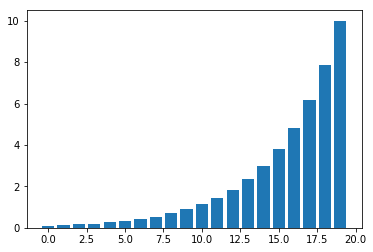

In [19]:
plt.bar(range(len(alphas)), alphas)

By default the `RidgeCV` uses "Leave One Out Cross Validation" (LOOCV). Let's fit the Ridge model

In [20]:
ridge_cv = linear_model.RidgeCV(alphas=alphas,
                               normalize=True,
                               store_cv_values=True)
ridge_cv.fit(X_train, y_train);

Let's see how it did relative to OLS.

In [21]:
print('Train R^2: %.04f' % (ridge_cv.score(X_train, y_train)))
print('Test R^2: %.04f' % (ridge_cv.score(X_test, y_test)))

Train R^2: 0.7475
Test R^2: 0.6642


In [26]:
ridge_cv.cv_values_.shape

(379, 20)

In [27]:
ridge_cv.cv_values_[:5,:]

array([[3.97201033e+00, 4.19892962e+00, 4.43804518e+00, 4.68252861e+00,
        4.92514607e+00, 5.15933151e+00, 5.38003930e+00, 5.58396336e+00,
        5.76889787e+00, 5.93239775e+00, 6.07031299e+00, 6.17597900e+00,
        6.24067221e+00, 6.25541449e+00, 6.21357258e+00, 6.11328072e+00,
        5.95874041e+00, 5.75991022e+00, 5.53074701e+00, 5.28667518e+00],
       [1.57074774e+00, 1.52167801e+00, 1.45466643e+00, 1.36800482e+00,
        1.26140139e+00, 1.13635568e+00, 9.96264370e-01, 8.46183072e-01,
        6.92279007e-01, 5.41129157e-01, 3.99083056e-01, 2.71869576e-01,
        1.64490062e-01, 8.12777112e-02, 2.59094149e-02, 1.18959742e-03,
        8.57526746e-03, 4.76019079e-02, 1.15493462e-01, 2.07213208e-01],
       [2.05004456e+00, 2.42230462e+00, 2.94937410e+00, 3.68225764e+00,
        4.68393876e+00, 6.02852992e+00, 7.79785411e+00, 1.00750308e+01,
        1.29355769e+01, 1.64377033e+01, 2.06142128e+01, 2.54680029e+01,
        3.09716003e+01, 3.70692681e+01, 4.36793301e+01, 5.0695

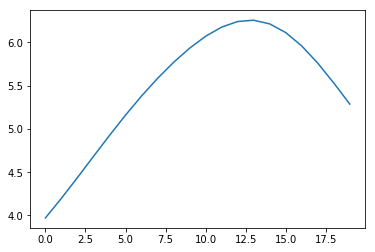

In [29]:
#Error ploting for the first set
plt.plot(ridge_cv.cv_values_[0,:])

Looks like it did a bit worse than using regular OLS! We can look at a plot showing the model performance (In mean squared error, or MSE) as a function of alpha size. Let's see

Text(0, 0.5, 'CV Performance (MSE)')

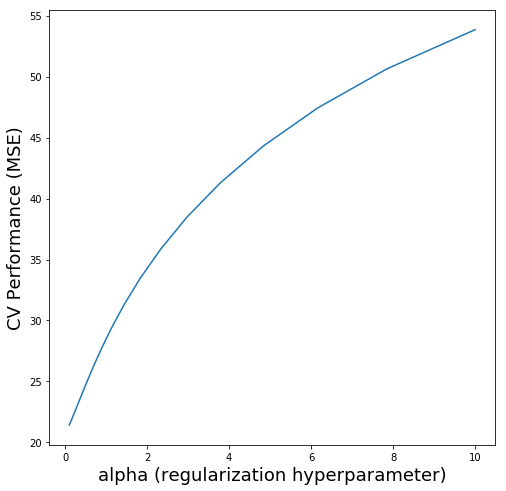

In [22]:
plt.figure(figsize=(8,8))
plt.plot(alphas, ridge_cv.cv_values_.mean(axis=0))
plt.xlabel('alpha (regularization hyperparameter)', fontsize=18)
plt.ylabel('CV Performance (MSE)', fontsize=18)

We can also look at the coefficients it estimated:

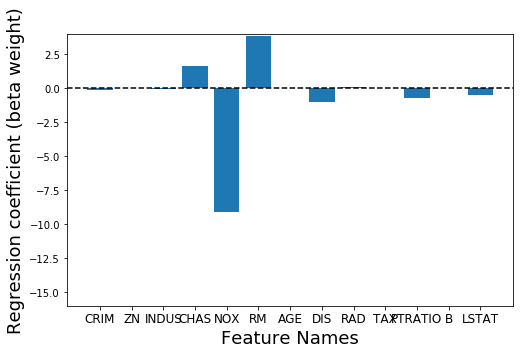

In [23]:
plt.figure(figsize=(8,5))
plt.bar(range(len(ridge_cv.coef_)), ridge_cv.coef_)
plt.xticks(np.arange(len(ridge_cv.coef_)),boston.feature_names, fontsize=12)
plt.axhline(y=0,linestyle='--',color='k')
plt.ylabel('Regression coefficient (beta weight)', fontsize=18);
plt.xlabel('Feature Names', fontsize=18);
plt.ylim([-16.0,4]);

### GLM - Elastic Net Regression

Elastic Net regression is another form of regularized regression that uses a combination of an L2 penalization (same as Ridge) and an L1 penalization (same as Lasso). See [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet) for more.

In [24]:
elastic_reg = linear_model.ElasticNet(alpha=1.0,  # penalty, 0 is OLS 
                               random_state=10,
                               selection='cyclic')  # or 'random', which converges faster

model = elastic_reg.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.5815604647475391


### Support Vector Regression

Support Vector Machines (SVMs) are popular and effective models that find the data points of each class that are closest to each other (the support vectors) and then find a hyperplane half way between those points. SVMs can be used in a linear fashion (as is done below) or by applying a non-linear kernel function. See [here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR) for more. 

In [30]:
from sklearn import svm

sv_reg = svm.SVR(kernel='linear',  # ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
                 degree=3,  # only used for 'poly' above
                 gamma='auto',  # kernal coeff, default auto is 1/n_features
                 C=1.0)

model = sv_reg.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.6341818326343751


## Non-Linear Models

### K-nearest neighbors regression

K Nearest Neighbors uses the averaged values of the `k` data points that are closest to the predicted value in the feature space. See [here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor) for more.

In [31]:
from sklearn import neighbors

knn_reg = neighbors.KNeighborsRegressor(n_neighbors=5,
                                        weights='uniform',  # ‘distance’ weights points by inverse of their distance
                                        algorithm='auto',  # out of ‘ball_tree’, ‘kd_tree’, ‘brute’
                                        leaf_size=30)  # for tree algorithms

model = knn_reg.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.4071575340412488


### Random Forest Regression

We've already used random forests for classification in the previous section, and here we'll use them for regression. See [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor) for more.

In [32]:
from sklearn import ensemble

rf_reg = ensemble.RandomForestRegressor(n_estimators=10,  # number of trees
                                        criterion='mse',  # how to measure fit
                                        max_depth=None,  # how deep tree nodes can go
                                        min_samples_split=2,  # samples needed to split node
                                        min_samples_leaf=1,  # samples needed for a leaf
                                        min_weight_fraction_leaf=0.0,  # weight of samples needed for a node
                                        max_features='auto',  # max feats
                                        max_leaf_nodes=None,  # max nodes
                                        n_jobs=1, # how many to run parallel
                                        random_state=10)

model = rf_reg.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.8460301889704555


### Boosting - AdaBoost Regression

You used an adaptive boosting, or AdaBoost, estimator to do classification in the challenge question of the previous section. Here we'll use it for regression. See [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html#sklearn.ensemble.AdaBoostRegressor) for more.

In [33]:
ab_reg = ensemble.AdaBoostRegressor(base_estimator=None,  # default is DT 
                                    n_estimators=50,  # number to try before stopping
                                    learning_rate=1.0,  # decrease influence of each additional estimator
                                    random_state=10,
                                    loss='linear')  # also ‘square’, ‘exponential’


model = ab_reg.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.8568420516850771


## 3) Grid Search

As with classfication, you can also use grid search on regression models.

In [34]:
param_grid = {'n_estimators': range(10,50),
              'learning_rate': np.arange(0.01, 1, .1)}

In [35]:
from sklearn.model_selection import GridSearchCV

model_reg = GridSearchCV(ensemble.AdaBoostRegressor(), param_grid, cv=3, iid=False)
model_reg.fit(X_train, y_train);

In [36]:
best_index = np.argmax(model_reg.cv_results_["mean_test_score"])

print(model_reg.cv_results_["params"][best_index])
print(max(model_reg.cv_results_["mean_test_score"]))
print(model_reg.score(X_test, y_test))

{'learning_rate': 0.7100000000000001, 'n_estimators': 22}
0.801756038586412
0.8552141948270672


## 4) Prediction

Great, not a bad fit! Let's say we come upon a house and want to guess its median value. Here are the feature values:

In [37]:
random_house = [.00631, 17.000, 2.410, 0, .538, 6.575, 65.200, 4.090, 1.00, 296.000, 15.300, 396.900, 4.980]

for i in range(len(random_house)):
    print(boston.feature_names[i])
    print(random_house[i])
    print()

CRIM
0.00631

ZN
17.0

INDUS
2.41

CHAS
0

NOX
0.538

RM
6.575

AGE
65.2

DIS
4.09

RAD
1.0

TAX
296.0

PTRATIO
15.3

B
396.9

LSTAT
4.98



Now let's use our model to predict!

In [38]:
model_reg.predict([random_house])

array([27.48787879])

## Challenge

Choose three algorithms and use grid search to determine the best model for this dataset. Make sure to base your decision on model perfomrance on the out-of-sample test set data.